# Introdução

![](https://i.imgur.com/Stv7spo.jpg)

O Coronavírus, causador da pandemia global, pertence a uma família de vírus (CoV) que já circula no Brasil. Os vírus dessa família podem causar desde resfriados comuns a doenças mais graves, como a Síndrome Aguda Respiratória Severa (SARS) e a Síndrome Respiratória do Oriente Médio (MERS).

O Novo Coronavírus recebeu a denominação SARS-CoV-2 pela Organização Mundial da Saúde (OMS) e a doença que ele provoca tem a denominação COVID-19.

# Descrição do Modelo

Neste notebook será utilizado o algorítimo ARVORE ALEATÓRIA (Random forests _ou_ Random Decision Forests) para realizar um forecast (previsão) do numero de mortes ocorridas no Brasil, em destaque no Estado de São Paulo.

O processo realizado nesse notebook segue o seguinte roteiro:

1. Importação dos dados fornecidos pelo [Ministério da Saúde](https://covid.saude.gov.br/), e a nível municipal, pelo [Brasil.io](https://brasil.io/dataset/covid19/caso/);
2. Análise visual dos dados;
3. Tratamento dos dados e aplicação do algorítimo
4.
5.

# Notebook

### Importação de Bibliotecas

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from django.core.validators import URLValidator
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px


# Tratamento e Visualização dos dados

### No Brasil


In [2]:
#Ultimos 10 dias  de morte no BRASIL!
original_df = pd.read_csv("cases-brazil-states-18-05-2020.csv");
df_br = original_df.filter(['date', 'state', 'deaths']);
df_br = df_br.loc[df_br['state'] == "TOTAL"];

### Declarando classe auxiliadora

In [3]:
from myownapi.AnalyticsXGBoost import AnalyticsXGBoost;
analytics = AnalyticsXGBoost();

#NOTA: Classe ocultada pois estou no meu pc, ela fica em outra pasta!

# Aplicando XGBoost

O modelo XGBoost é aplicado utilizando a classe auxiliadora declarada acima.

## No Brasil

In [4]:
original_df = None; #Deleta isso para lagar menos a IDE

In [5]:
df_br_altered = df_br.filter(['deaths']);
df_br_altered = df_br_altered.reset_index(drop=True)
df_br_altered['date'] = df_br_altered.index.copy();
df_br_altered = df_br_altered.iloc[21:] #Removendo os primerios 21  dias devido a auxencia de mortes

Para prejudica menos o algorítimo de flore elatória, removemos os primeiros 23 dias por nao constatarem nenhuma morte.

In [6]:
print("Aplicando ARVORE DE DECISÃO para os dados nacionais")
analytics_br = AnalyticsXGBoost();
analytics_br.df = df_br_altered;
analytics_br.definirAtributosDePrecisao(['date'])
analytics_br.definirAtributoDesejado('deaths');
analytics_br.definirPorcentagemDeTeste(20);
analytics_br.aplicarXGBoost();

Aplicando ARVORE DE DECISÃO para os dados nacionais
Atributos de precisão definidos para:
-->  date
Total de 1 atributos.
Definindo atributo desejado para: deaths
Porcentagem de Teste definido para: 20%
Porcentagem de Treino definido para: 80%
Iniciando XGBoostRegressor
[06:57:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost aplicado com sucesso!


In [7]:
x_train, x_test, y_train, y_test = train_test_split(analytics_br.dfDeAtributosPrecisao,analytics_br.dfDeAtributoDesejado, test_size=(analytics_br.porcentagem_teste / 100),shuffle=False);
y_pred = analytics_br.xGBoostRegressor.predict(x_test);  # Realiza a predição de acordo com o X de teste
df = pd.DataFrame({'Atual': y_test['deaths'], 'Predição': y_pred})
df

,Atual,Predição
71,8597,7935.657715
72,9268,7935.657715
73,10027,7935.657715
74,10697,7935.657715
75,11175,7935.657715
76,11659,7935.657715
77,12502,7935.657715
78,13280,7935.657715
79,14069,7935.657715
80,14982,7935.657715


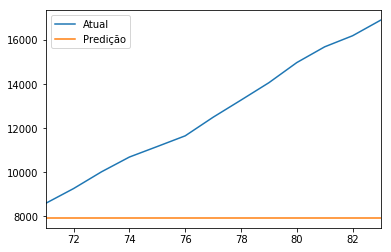

In [8]:
df.plot()

In [9]:
lastIndex = analytics_br.df.tail(1).index.item() + 1;
x_forecast = [];
for i in range(10):
    x_forecast.append(i + lastIndex);
x_forecast = DataFrame(columns={'date'}, data=x_forecast)
x_forecast.head(5)

,date
0,84
1,85
2,86
3,87
4,88


In [10]:
y_forecast = analytics_br.xGBoostRegressor.predict(x_forecast);  # Realiza a predição de acordo com o X de teste

In [11]:
y_forecast

array([7935.6577, 7935.6577, 7935.6577, 7935.6577, 7935.6577, 7935.6577,
       7935.6577, 7935.6577, 7935.6577, 7935.6577], dtype=float32)

https://xgboost.readthedocs.io/en/latest/

https://www.kaggle.com/c/web-traffic-time-series-forecasting/discussion/38352